In [49]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
# upload dataset
data = pd.read_csv('FuelConsumptionCo2.csv')

 work on data set and analyze it

In [51]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [52]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [53]:
data.shape

(1067, 13)

In [54]:
data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [55]:
data.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [56]:
cdf = data[[ 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
5,3.5,6,11.9,7.7,10.0,28,230
6,3.5,6,11.8,8.1,10.1,28,232
7,3.7,6,12.8,9.0,11.1,25,255
8,3.7,6,13.4,9.5,11.6,24,267


In [57]:
data.nunique()

MODELYEAR                     1
MAKE                         39
MODEL                       663
VEHICLECLASS                 16
ENGINESIZE                   45
CYLINDERS                     7
TRANSMISSION                 22
FUELTYPE                      4
FUELCONSUMPTION_CITY        167
FUELCONSUMPTION_HWY         118
FUELCONSUMPTION_COMB        148
FUELCONSUMPTION_COMB_MPG     43
CO2EMISSIONS                159
dtype: int64

In [58]:
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [59]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [60]:
corr = data.corr()
corr.shape

(8, 8)

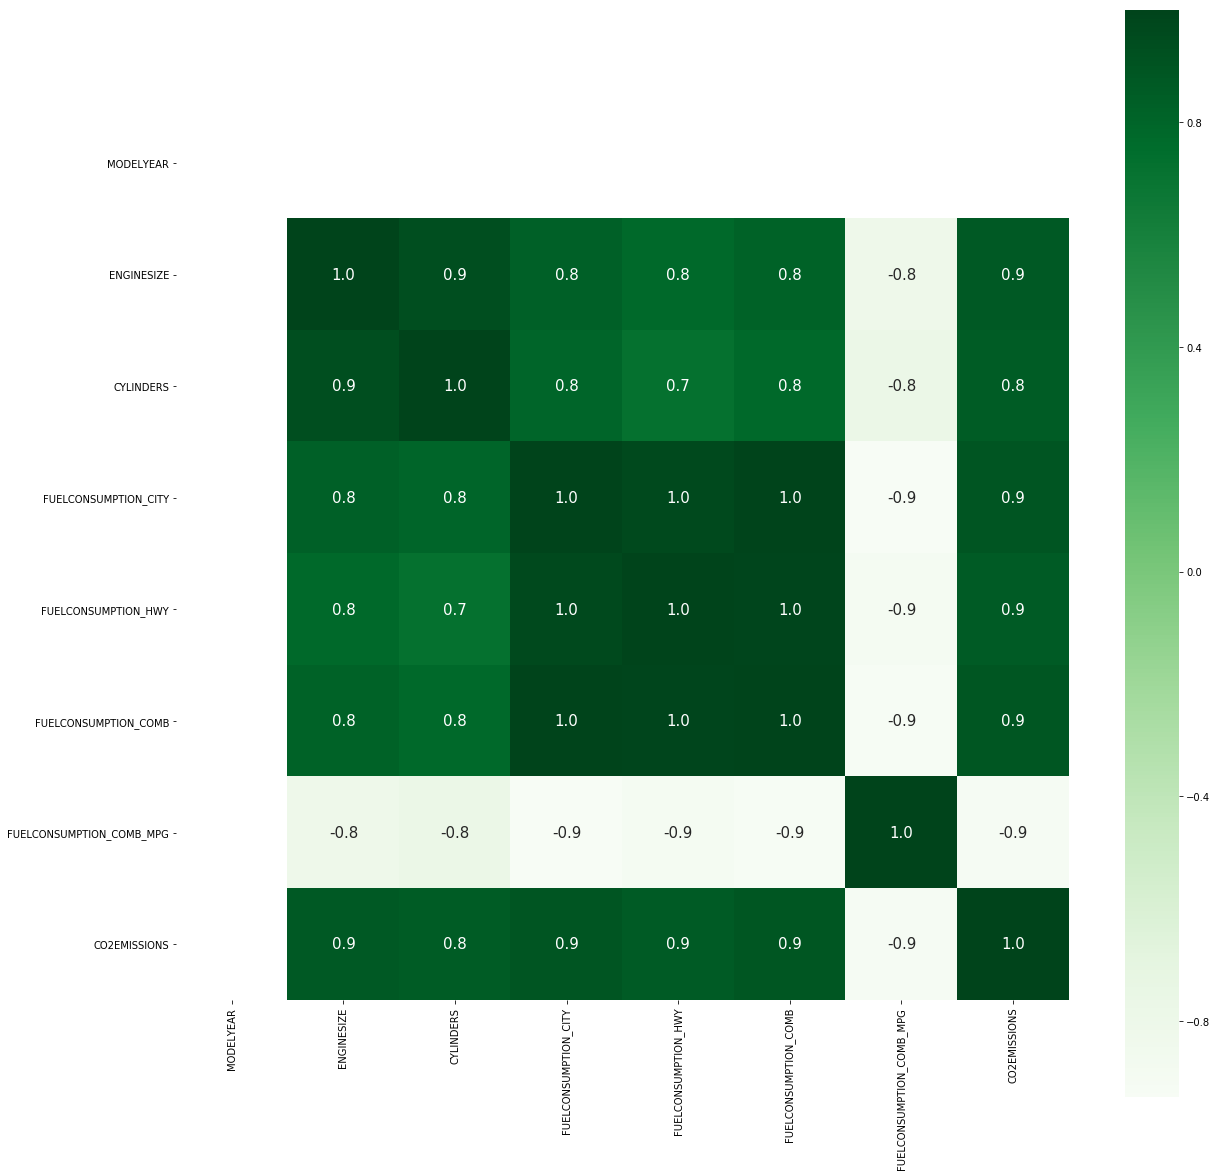

In [61]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

Text(0,0.5,'CO2EMISSIONS')

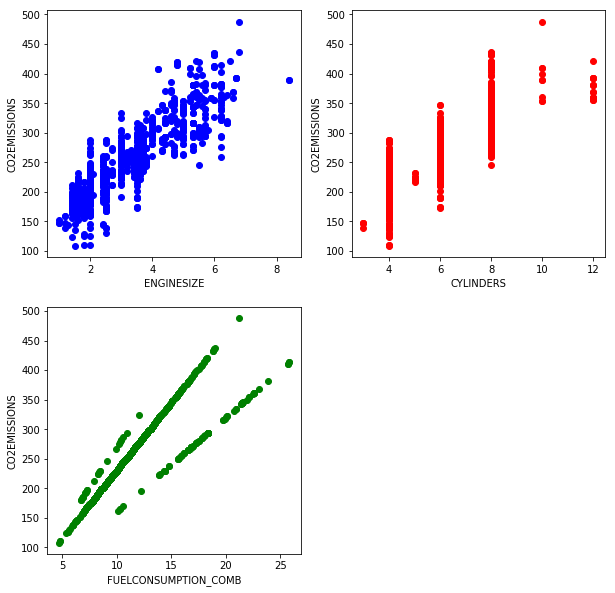

In [62]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.subplot(222)
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS, color='red')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.subplot(223)
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS, color='green')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
# plt.subplot(224)
# plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color='blue')
# plt.xlabel('ENGINESIZE')
# plt.ylabel('CO2EMISSIONS')

 split data to train and test

In [41]:
msk = np.random.rand(len(data))<0.8
train = cdf[msk]
test = cdf[~msk]

 train data set , fit and find coefficint and intercept

In [42]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS',  'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(x,y)
print('coefficient : ' , regr.coef_  )
print('intercept : ' , regr.intercept_ )

coefficient :  [[10.82533839  7.68215263  9.60925774]]
intercept :  [64.52111016]


 fit with test data and see result

In [43]:
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS',  'FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS',  'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print('residual sum of squares : %2.f' % np.mean((y_hat - y)**2 ))


print('variance score : %.2f ' ,  regr.score(x,y))

residual sum of squares : 534
variance score : %.2f  0.8571399791098753


Polynomial Regression

In [44]:
import pylab as pl

In [45]:
clf = linear_model.LinearRegression()
y_train_poly = clf.fit(x_train_poly ,y_train )

print('coefficient : ' , clf.coef_  )
print('intercept : ' , clf.intercept_  )

coefficient :  [[ 0.         59.07864881 -2.45214818]]
intercept :  [87.62673678]


In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

x_train = np.asanyarray(test[['ENGINESIZE']])
y_train = np.asanyarray(test[['CO2EMISSIONS']])

x_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

print(x_train[:3])
poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(x_train)
x_train_poly


[[2. ]
 [3.5]
 [2.4]]


array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  5.9 , 34.81],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  6.3 , 39.69],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  4.2 , 17.64],
       [ 1.  ,  5.2 , 27.04],
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.6 , 12.96],
       [ 1.  ,  1.4 ,  1.96],
       [ 1.  ,  3.6 , 12.96],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  2.4 ,  5.76],
       [ 1

Text(0,0.5,'CO2EMISSIONS')

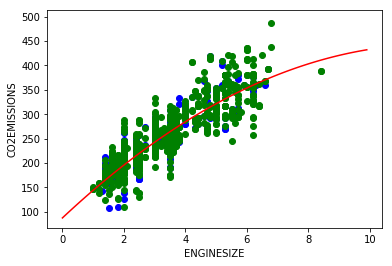

In [47]:
plt.scatter(x_train,y_train,color = 'blue')
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS ,color = 'green')
xx = np.arange(0,10,0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*xx + clf.coef_[0][2]*np.power(xx,2) 

plt.plot(xx , yy , 'r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')


In [48]:
from sklearn.metrics import r2_score

x_test_poly = poly.fit_transform(x_test)
y_test_poly = clf.predict(x_test_poly)

print('mean absolute error %2.f' % np.mean(np.absolute(y_test_poly - y_test)))
print('residual sum of squares(MSE) : %2.f' % np.mean((y_test_poly - y_test)**2 ))
print('R2_score : %.2f '%  r2_score(y_test,y_test_poly))

mean absolute error 24
residual sum of squares(MSE) : 910
R2_score : 0.76 
